In [ ]:
import pandas as pd
import seaborn as sns

sns.set_theme(style="darkgrid")
sns.set_palette("Set2")

In [21]:
# Cell that reading Log file
logfile = open('scalability.log', 'r')
lines = logfile.readlines()

# Parse experiment config
loop_count = int(lines[0])
max_clients = int(lines[2])
iterations = int(lines[3])

# Preparing columns
run_numbers = []
client_ids = []
latency = []
num_cur_clients = []
approaches = []

ct = 4
# Parse experiment results
for num_clients in range(1, max_clients+1):
    for i in range (loop_count):
        for id in range(0, num_clients):
            run_numbers.append(i)
            client_ids.append(id)
            latency.append(float(lines[ct]))
            num_cur_clients.append(num_clients)
            approaches.append("independent unelevated")
            ct += 1
    for i in range (loop_count):
        for id in range(0, num_clients):
            run_numbers.append(i)
            client_ids.append(id)
            latency.append(float(lines[ct]))
            num_cur_clients.append(num_clients)
            approaches.append("server client unelevated")
            ct += 1

"""
for i in range (loop_count):
    for id in range(0, max_clients+1):
        run_numbers.append(i)
        client_ids.append(id)
        latency.append(float(lines[ct]))
        num_cur_clients.append(max_clients+1)
        approaches.append("independent unelevated")
        ct += 1
"""

# Prepare dataframe

dict = {
    'run#': run_numbers,
    'client_id': client_ids,
    'latency': latency,
    'num clients': num_cur_clients,
    'approach': approaches
}

df = pd.DataFrame(dict)

df['throughput'] = ([iterations]*len(df)) / df['latency']
df.head()

,run#,client_id,latency,num clients,approach,throughput
0,0,0,0.585749,1,independent unelevated,170721.588940
1,1,0,0.581572,1,independent unelevated,171947.755394
2,2,0,0.581332,1,independent unelevated,172018.743162
3,3,0,0.581566,1,independent unelevated,171949.529374
4,4,0,0.601768,1,independent unelevated,166176.998445


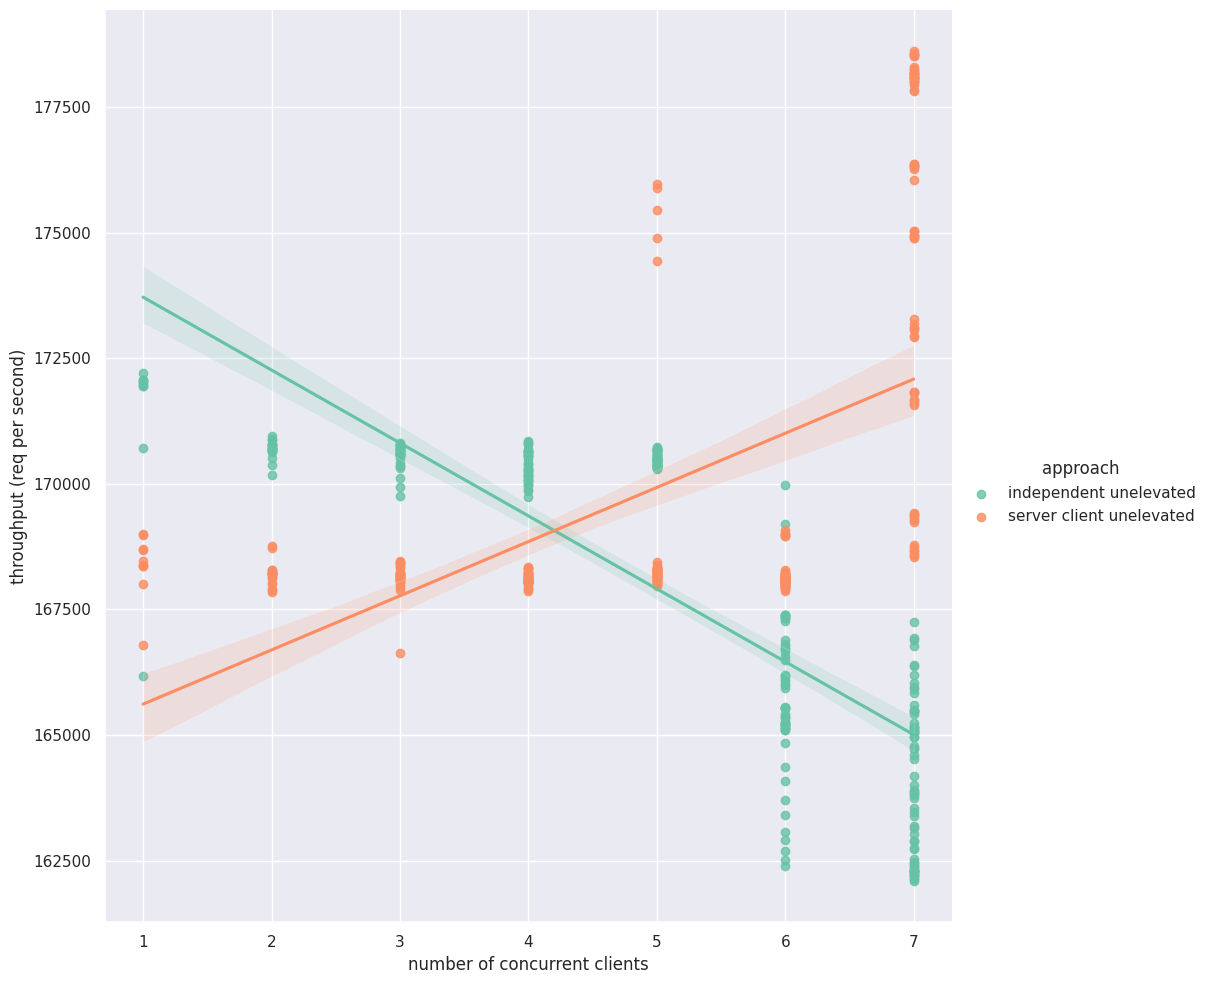

In [22]:
p1=sns.lmplot(data=df, x="num clients", y="throughput", hue="approach",  height=10)
p1.set_axis_labels("number of concurrent clients", "throughput (req per second)")

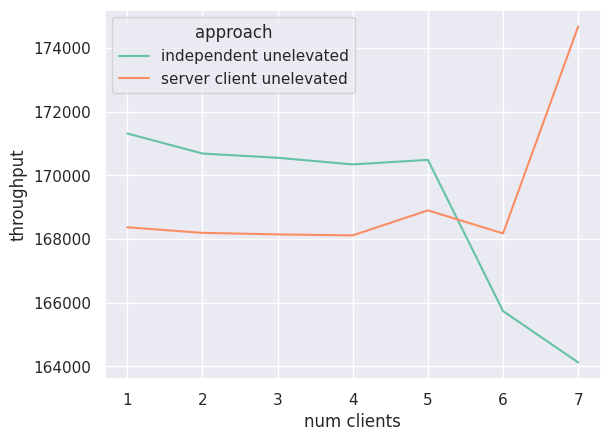

In [30]:
avg_df = df.groupby(["num clients", "approach"])["throughput"].mean().reset_index()
p2=sns.lineplot(data=avg_df, x="num clients", y="throughput", hue="approach")